In [3]:
import pandas as pd
import numpy as np

In [4]:
import pydicom
import sys
import matplotlib.pyplot as plt
from pydicom import dcmread
from pydicom.data import get_testdata_file
import os

In [5]:
cd /scratch/adrianov/elsa

/scratch/adrianov/elsa


In [6]:
mypath = '/scratch/adrianov/elsa'

## Pcts padrao ouro

In [7]:
padrao_ouro = [3000166, 3000166, 3000267, 3000267, 3000750, 3000750, 3000902, 3000902, 3001889, 3001889, 3004037, 3004037, 3004342, 3004342, 3005659, 3005659, 3008275, 3008275, 3010408, 3010408, 3010802, 3010802, 3010852, 3010852, 3012793, 3012793, 3014507, 3014507, 3014925, 3014925, 3017464, 3017464, 3017515, 3017515, 3019406, 3019406, 3019848, 3019848, 3020598, 3020598, 3022150, 3022150, 3022326, 3022326, 3022782, 3022782, 3023633, 3023633, 3024469, 3024469, 3025625, 3025625, 3027097, 3027097, 3027299, 3027299, 3027643, 3027643, 3028304, 3028304, 3028532, 3028532, 3029419, 3029419, 3030703, 3030703, 3031870, 3031870, 3032757, 3032757, 3035486, 3035486, 3037226, 3037226, 3039511, 3039511, 3039674, 3039674, 3040324, 3040324, 3042811, 3042811, 3044904, 3044904, 3045297, 3045297, 3049067, 3049067, 3051644, 3051644, 3051757, 3051757, 3052189, 3052189, 3052280, 3052280, 3054018, 3054018, 3056264, 3056264, 3056428, 3056428, 3056618, 3056618, 3056694, 3056694, 3057103, 3057103, 3058129, 3058129, 3061138, 3061138, 3061556, 3061556, 3062914, 3062914, 3063788, 3063788, 3064312, 3064312, 3064843, 3064843, 3064968, 3064968, 3067419, 3067419, 3069463, 3069463, 3070808, 3070808, 3072042, 3072042, 3072460, 3072460, 3074072, 3074072, 3075149, 3075149, 3076658, 3076658, 3078777, 3078777, 3078816, 3078816, 3079274, 3079274, 3080568, 3080568, 3081015, 3081015, 3083588, 3083588, 3084364, 3084364, 3086469, 3086469, 3086851, 3086851, 3087093, 3087093, 3088401, 3088401, 3091333, 3091333, 3093010, 3093010, 3093159, 3093159, 3096333, 3096333, 3099199, 3099199, 3101653, 3101653, 3103948, 3103948, 3104546, 3104546, 3105827, 3105827, 3106033, 3106033, 3201237, 3201237, 3201643, 3201643, 3201972, 3201972, 3202518, 3202518, 3202695, 3202695, 3204372, 3204372, 3206186, 3206186, 3207328, 3207328, 3208623, 3208623, 3208647, 3208647, 3210806, 3210806, 3211226, 3211226, 3024015, 3024015, 3024154, 3024154, 3014999, 3014999, 3007247, 3007247, 3025358, 3025358, 3010989, 3010989, 3024546, 3024546, 3024320, 3024320, 3023734, 3023734, 3006221, 3006221, 3004962, 3004962, 3015460, 3015460, 3014761, 3014761, 3025043, 3025043, 3008744, 3008744, 3004758, 3004758, 3025485, 3025485, 3023607, 3023607, 3008542, 3008542, 3015307, 3015307, 3015573, 3015573, 3005801, 3005801, 3007160, 3007160, 3008578, 3008578, 3009924, 3009924, 3011222, 3011222, 3014987, 3014987, 3015725, 3015725, 3015787, 3015787, 3015826, 3015826, 3019610, 3019610, 3021223, 3021223, 3021285, 3021285, 3025334, 3025334, 3025411, 3025411, 3008972, 3008972, 3010814, 3010814, 3000243, 3000243, 3000875, 3000875, 3000914, 3000914, 3000940, 3000940, 3001637, 3001637, 3001891, 3001891, 3001928, 3001928, 3002007, 3002007, 3002019, 3002019, 3002209, 3002209, 3002211, 3002211, 3002300, 3002300, 3002552, 3002552, 3002704, 3002704, 3002754, 3002754, 3002831, 3002831, 3003150, 3003150, 3003198, 3003198, 3003213, 3003213, 3003225, 3003225, 3003249, 3003249, 3003388, 3003388, 3003504, 3003504, 3003845, 3003845, 3003934, 3003934, 3007413, 3007413, 3007615, 3007615, 3007893, 3007893, 3008592, 3008592, 3008871, 3008871, 3008960, 3008960, 3009051, 3009051, 3009532, 3009532, 3009948, 3009948, 3010244, 3010244, 3010662, 3010662, 3010751, 3010751, 3012464, 3012464]

In [8]:
from os import listdir
from os.path import isfile, join
pcts_ouro = []
onlyfiles = [f for f in listdir(mypath)]
for item in onlyfiles:
    if '_' in item and 'Teste' not in item:
        ptcID = item.split('_')
        #print(item, ptcID)
        if int(ptcID[-1]) in padrao_ouro:
            pcts_ouro.append(item)

In [9]:
filelist = []

for root, dirs, files in os.walk(mypath):
	for file in files:
        #append the file name to the list
		filelist.append(os.path.join(root,file))

#print all the file names
for name in filelist:
    print(name)

/scratch/adrianov/elsa/dicom.py
/scratch/adrianov/elsa/Vices_1430_3078018/Membros_Superiores_Membros_Inferiores_1305091402485153_20130509/JOELHO_4_142125/IM-0702-0001.dcm
/scratch/adrianov/elsa/Vices_1430_3078018/Membros_Superiores_Membros_Inferiores_1305091402485153_20130509/JOELHO_5_142236/IM-0703-0001.dcm
/scratch/adrianov/elsa/Vices_1430_3078018/Membros_Superiores_Membros_Inferiores_1305091402485153_20130509/MAO_1_141337/IM-0699-0001.dcm
/scratch/adrianov/elsa/Vices_1430_3078018/Membros_Superiores_Membros_Inferiores_1305091402485153_20130509/MAO_2_141448/IM-0700-0001.dcm
/scratch/adrianov/elsa/Vices_1430_3078018/Membros_Superiores_Membros_Inferiores_1305091402485153_20130509/JOELHO_3_141651/IM-0701-0001.dcm
/scratch/adrianov/elsa/Gesv_1500_3099923/Membros_Inferiores_Membros_Superiores_1301301452572069_20130130/MAO_5_145912/IM-9919-0001.dcm
/scratch/adrianov/elsa/Gesv_1500_3099923/Membros_Inferiores_Membros_Superiores_1301301452572069_20130130/JOELHO_1_150431/IM-9916-0001.dcm
/scrat

In [10]:
import glob, os 
os.chdir(mypath) 
for file in glob.glob("*.dcm"): print(file)

In [11]:
pcts_ouro

['Gmg_1130_3079274',
 'Frp_1530_3014987',
 'Mcs_1200_3039674',
 'Esg_1430_3064968',
 'Jbnj_1430_3039511',
 'Erl_1600_3025625',
 'Sos_1200_3000875',
 'Jnpm_1500_3025411',
 'Vmv_1330_3019406',
 'Mgcb_1430_3099199',
 'Jem_1230_3007160',
 'Tac_1500_3002019',
 'Mes_1530_3009948',
 'Mmg_1230_3206186',
 'Wgo_1100_3024469',
 'Gdm_0830_3002754',
 'Aaf_945_3027643',
 'Jgc_1300_3015787',
 'Vrl_1300_3076658',
 'Mgfs_1200_3072042',
 'Mas_1130_3025043',
 'Gc_1330_3057103',
 'Croc_1330_3211226',
 'Afs_1500_3003150',
 'Ama_1030_3014999',
 'Mcv_1430_3009051',
 'Mdcg_1430_3078777',
 'Esc_1600_3044904',
 'Mcc_1230_3010852',
 'Jtm_1130_3208623',
 'Aml_1530_3002209',
 'Smr_1300_3010408',
 'Mscb_1300_3017464',
 'Fsmn_900_3007893',
 'Abao_1600_3088401',
 'Vfcl_1300_3003504',
 'Jcs_1330_3074072',
 'Mlso_1200_3002552',
 'Mcrs_1400_3000166',
 'Mlagf_1100_3003225',
 'Wmaa_800_3078816',
 'Isl_1430_3008275',
 'Mirr_1530_3052189',
 'Ana_1600_3029419',
 'Lcc_1700_3096333',
 'Alsc_1530_3017515',
 'Eb_1400_3019848',
 

In [14]:
path = '/scratch/adrianov/elsa/'
for item in pcts_ouro:
    path_complete = path+item
    print(path_complete)

/scratch/adrianov/elsa/Gmg_1130_3079274
/scratch/adrianov/elsa/Frp_1530_3014987
/scratch/adrianov/elsa/Mcs_1200_3039674
/scratch/adrianov/elsa/Esg_1430_3064968
/scratch/adrianov/elsa/Jbnj_1430_3039511
/scratch/adrianov/elsa/Erl_1600_3025625
/scratch/adrianov/elsa/Sos_1200_3000875
/scratch/adrianov/elsa/Jnpm_1500_3025411
/scratch/adrianov/elsa/Vmv_1330_3019406
/scratch/adrianov/elsa/Mgcb_1430_3099199
/scratch/adrianov/elsa/Jem_1230_3007160
/scratch/adrianov/elsa/Tac_1500_3002019
/scratch/adrianov/elsa/Mes_1530_3009948
/scratch/adrianov/elsa/Mmg_1230_3206186
/scratch/adrianov/elsa/Wgo_1100_3024469
/scratch/adrianov/elsa/Gdm_0830_3002754
/scratch/adrianov/elsa/Aaf_945_3027643
/scratch/adrianov/elsa/Jgc_1300_3015787
/scratch/adrianov/elsa/Vrl_1300_3076658
/scratch/adrianov/elsa/Mgfs_1200_3072042
/scratch/adrianov/elsa/Mas_1130_3025043
/scratch/adrianov/elsa/Gc_1330_3057103
/scratch/adrianov/elsa/Croc_1330_3211226
/scratch/adrianov/elsa/Afs_1500_3003150
/scratch/adrianov/elsa/Ama_1030_30149

In [12]:
dataset = pydicom.dcmread('/scratch/adrianov/elsa/Aa_1100_3042075/Membros_Inferiores_Membros_Superiores_1302011107459647_20130201/JOELHO_3_111749/IM-14424-0001.dcm')
print(dataset.top())

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 208
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Computed Radiography Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.51.0.7.1727545177.32633.28494.37249.55485.8248.61939
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7238010.5.0.3.5.4
(0002, 0013) Implementation Version Name         SH: 'OSIRIX'
(0002, 0016) Source Application Entity Title     AE: 'AE_AGFA_NX'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY']
(0008, 0012) Instance Creation Date              DA: '20130201'
(0008, 0013) Instance Creation Time              TM: '110803'
(0008, 0016) SOP Class UID                       UI: Computed Radiography Image Storage
(

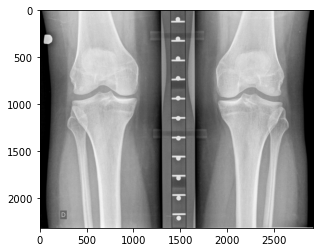

In [13]:
# `arr` is a numpy.ndarray
arr = dataset.pixel_array

plt.imshow(arr, cmap="gray")
plt.show()

In [16]:
dataset = pydicom.dcmread('/scratch/adrianov/elsa/Aa_1100_3042075/Membros_Inferiores_Membros_Superiores_1302011107459647_20130201/JOELHO_3_111749/IM-14424-0001.dcm')
print(dataset.top())

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 208
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Computed Radiography Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.51.0.7.1727545177.32633.28494.37249.55485.8248.61939
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7238010.5.0.3.5.4
(0002, 0013) Implementation Version Name         SH: 'OSIRIX'
(0002, 0016) Source Application Entity Title     AE: 'AE_AGFA_NX'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY']
(0008, 0012) Instance Creation Date              DA: '20130201'
(0008, 0013) Instance Creation Time              TM: '110803'
(0008, 0016) SOP Class UID                       UI: Computed Radiography Image Storage
(

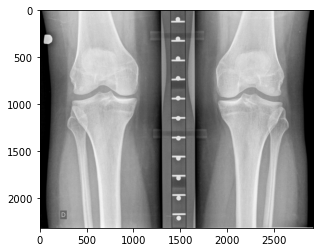

In [17]:
# `arr` is a numpy.ndarray
arr = dataset.pixel_array

plt.imshow(arr, cmap="gray")
plt.show()

In [18]:
dataset = pydicom.dcmread('/scratch/adrianov/elsa/Aa_1100_3042075/Membros_Inferiores_Membros_Superiores_1302011107459647_20130201/JOELHO_3_111749/IM-14424-0001.dcm')
print(dataset.top())

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 208
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Computed Radiography Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.51.0.7.1727545177.32633.28494.37249.55485.8248.61939
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7238010.5.0.3.5.4
(0002, 0013) Implementation Version Name         SH: 'OSIRIX'
(0002, 0016) Source Application Entity Title     AE: 'AE_AGFA_NX'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY']
(0008, 0012) Instance Creation Date              DA: '20130201'
(0008, 0013) Instance Creation Time              TM: '110803'
(0008, 0016) SOP Class UID                       UI: Computed Radiography Image Storage
(

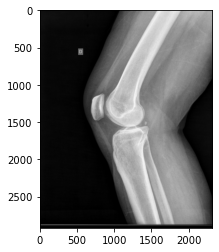

In [17]:
# `arr` is a numpy.ndarray
arr = dataset.pixel_array

plt.imshow(arr, cmap="gray")
plt.show()

In [19]:
dataset.ViewPosition

'PA'

In [20]:
int(dataset.PatientID) in padrao_ouro

False

In [40]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(mypath)]
for item in onlyfiles:
    if '_' in item:
        ptcID = item.split('_')
        #print(item, ptcID)
        if int(ptcID[-1]) in padrao_ouro:
            print(item)

Gmg_1130_3079274
Mcs_1200_3039674
Esg_1430_3064968
Jbnj_1430_3039511
Erl_1600_3025625
Vmv_1330_3019406
Mgcb_1430_3099199
Mmg_1230_3206186
Wgo_1100_3024469
Aaf_945_3027643
Vrl_1300_3076658
Mgfs_1200_3072042
Gc_1330_3057103
Croc_1330_3211226
Mdcg_1430_3078777
Esc_1600_3044904
Mcc_1230_3010852
Jtm_1130_3208623
Smr_1300_3010408
Mscb_1300_3017464
Abao_1600_3088401
Jcs_1330_3074072
Mcrs_1400_3000166
Wmaa_800_3078816
Isl_1430_3008275
Mirr_1530_3052189
Ana_1600_3029419
Lcc_1700_3096333
Alsc_1530_3017515
Eb_1400_3019848
Smmof_1530_3063788
Mlap_1200_3012793
Rjm_1530_3070808
Cao_1200_3091333
Mars_1500_3204372
Mcos_1130_3105827
Rmg_1530_3014925
Mmga_1500_3022150
Acv_1130_3022782


ValueError: invalid literal for int() with base 10: 'Teste'

In [41]:
dataset = pydicom.dcmread('/scratch/adrianov/elsa/Gmg_1130_3079274/Membros_Inferiores_Membros_Superiores_1305201232558955_20130520/JOELHO_1_124419/IM-9775-0001.dcm')
print(dataset.top())

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 210
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Computed Radiography Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.51.0.7.13647447731.20180.29513.38195.63697.35116.14547
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7238010.5.0.3.5.4
(0002, 0013) Implementation Version Name         SH: 'OSIRIX'
(0002, 0016) Source Application Entity Title     AE: 'AE_AGFA_NX'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY']
(0008, 0012) Instance Creation Date              DA: '20130520'
(0008, 0013) Instance Creation Time              TM: '123320'
(0008, 0016) SOP Class UID                       UI: Computed Radiography Image Storage

## Tentando identificar um joelho lateral e um frontal

In [12]:
dataset1 = pydicom.dcmread('/scratch/adrianov/elsa/Esc_1600_3044904/Membros_Superiores_Membros_Inferiores_1302271407153323_20130227/JOELHO_4_142333/IM-10576-0001.dcm')
print(dataset1.top())

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 206
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Computed Radiography Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.51.0.7.47626363.45492.50241.41419.11263.3330.53222
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7238010.5.0.3.5.4
(0002, 0013) Implementation Version Name         SH: 'OSIRIX'
(0002, 0016) Source Application Entity Title     AE: 'AE_AGFA_NX'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY']
(0008, 0012) Instance Creation Date              DA: '20130227'
(0008, 0013) Instance Creation Time              TM: '140740'
(0008, 0016) SOP Class UID                       UI: Computed Radiography Image Storage
(00

In [13]:
dataset1 = pydicom.dcmread('/scratch/adrianov/elsa/Esc_1600_3044904/Membros_Superiores_Membros_Inferiores_1302271407153323_20130227/JOELHO_6_142804/IM-10577-0001.dcm')
print(dataset1.top())

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 208
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Computed Radiography Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.51.0.7.1695937459.39161.42056.44995.60155.46754.6086
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7238010.5.0.3.5.4
(0002, 0013) Implementation Version Name         SH: 'OSIRIX'
(0002, 0016) Source Application Entity Title     AE: 'AE_AGFA_NX'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY']
(0008, 0012) Instance Creation Date              DA: '20130227'
(0008, 0013) Instance Creation Time              TM: '142624'
(0008, 0016) SOP Class UID                       UI: Computed Radiography Image Storage
(

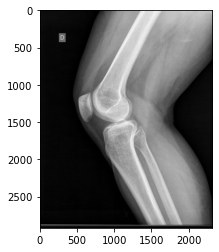

In [27]:
# `arr` is a numpy.ndarray
arr = dataset1.pixel_array

plt.imshow(arr, cmap="gray")
plt.show()

In [28]:
dataset2 = pydicom.dcmread('/scratch/adrianov/elsa/Esc_1600_3044904/Membros_Superiores_Membros_Inferiores_1302271407153323_20130227/JOELHO_3_142042/IM-10575-0001.dcm')
print(dataset2.top())

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 206
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Computed Radiography Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.51.0.7.1544787363.22125.834.47066.2062.35033.59860
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7238010.5.0.3.5.4
(0002, 0013) Implementation Version Name         SH: 'OSIRIX'
(0002, 0016) Source Application Entity Title     AE: 'AE_AGFA_NX'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY']
(0008, 0012) Instance Creation Date              DA: '20130227'
(0008, 0013) Instance Creation Time              TM: '140740'
(0008, 0016) SOP Class UID                       UI: Computed Radiography Image Storage
(00

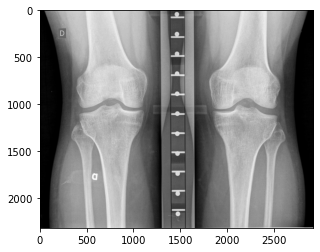

In [30]:
# `arr` is a numpy.ndarray
arr = dataset2.pixel_array

plt.imshow(arr, cmap="gray")
plt.show()

In [25]:
dataset1.

''